In [1]:
# Importing Libraries
import matplotlib.pyplot as plt
import pandas
import numpy as np

In [2]:
# Read in the csv using Pandas
people_df = pandas.read_csv("people-1000.csv")
people_df.head() #view the csv

,Index,User Id,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title
0,1,8717bbf45cCDbEe,Shelia,Mahoney,Male,pwarner@example.org,857.139.8239,2014-01-27,Probation officer
1,2,3d5AD30A4cD38ed,Jo,Rivers,Female,fergusonkatherine@example.net,+1-950-759-8687,1931-07-26,Dancer
2,3,810Ce0F276Badec,Sheryl,Lowery,Female,fhoward@example.org,(599)782-0605,2013-11-25,Copy
3,4,BF2a889C00f0cE1,Whitney,Hooper,Male,zjohnston@example.com,+1-939-130-6258,2012-11-17,Counselling psychologist
4,5,9afFEafAe1CBBB9,Lindsey,Rice,Female,elin@example.net,(390)417-1635x3010,1923-04-15,Biomedical engineer


In [3]:
#View the required column: Email
people_df["Email"]

0                pwarner@example.org
1      fergusonkatherine@example.net
2                fhoward@example.org
3              zjohnston@example.com
4                   elin@example.net
                   ...              
995           lyonsdaisy@example.net
996          dariusbryan@example.com
997           georgechan@example.org
998              wanda04@example.net
999          deannablack@example.org
Name: Email, Length: 1000, dtype: object

In [4]:
#How many unique email domains are there? 
people_df['domain'] = people_df['Email'].str.split('@').str[1] #String split after the @ symbol to extract only the domain 
people_df['domain'].unique() #Determine how many domains are in the dataframe

array(['example.org', 'example.net', 'example.com'], dtype=object)

Text(0.5, 1.0, 'Email Domain Usage')

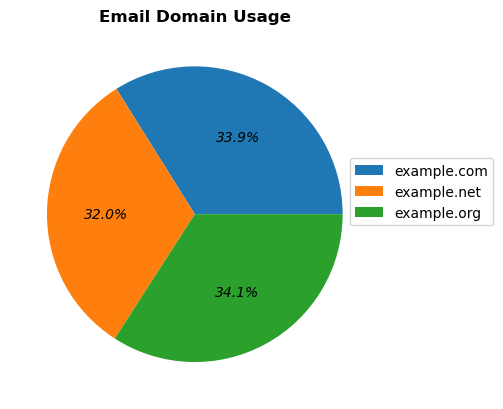

In [12]:
email_domains_count = (people_df.groupby(["domain"], dropna=False)["domain"].count()) #Use groupby to find how many of each domain there are. Returns a Pandas Series that can be indexed easily, in same order as the email_domains list created below... 
email_domains = list(email_domains_count.index) #List of the unique domains for the plot, in the same order as the data frame created. (Using .unique to get the labels returned a list in the incorrect order!)

fig, ax = plt.subplots()
ax.pie(email_domains_count, labels=email_domains, labeldistance=None, autopct='%1.1f%%', 
       textprops = {'fontsize': 10, 'color': 'black', 'fontstyle': 'italic'},
       )
ax.legend(loc="upper left", bbox_to_anchor= (0.9, 0.67) )
ax.set_title("Email Domain Usage",
             fontdict = {'fontsize': 'large','fontweight' : "bold",}
             )